### Importing Libraries

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer

from matplotlib import pyplot as plt 
%matplotlib inline

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

### Importing Dataset

In [2]:
categories = ['alt.atheism', 'comp.graphics', 'sci.crypt', 'sci.electronics',
              'sci.med', 'sci.space', 'talk.politics.misc', 'talk.religion.misc']

# importing train and test dataset
training_data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
X_train = training_data.data
y_train = training_data.target
print('Training data length: ', len(training_data.data))

testing_data = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)
X_test = testing_data.data
y_test = testing_data.target
print('Testing data length: ', len(testing_data.data))


Training data length:  4279
Testing data length:  2848


### Confusion Matrix Function

In [3]:
def createMatrix(y_pred):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=categories
    )

    fig, ax = plt.subplots(figsize=(6, 6))
    disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')
    plt.title('Confusion Matrix')
    plt.show()

### Classification Report Function

In [4]:
def ClassificationReport(y_pred):
    report = classification_report(y_test, y_pred, target_names=categories)
    print(report)

# Logistic Regression

## Tf-idf Vectorizer

In [5]:
pipeline = Pipeline([
    ('Tf-idf vectorizer', TfidfVectorizer()),
    ('Tf-idf transformer', TfidfTransformer()),
    ('Logistic Regression', LogisticRegression())
])

pipeline.fit(X_train, y_train)
lr_pred_tfidf = pipeline.predict(X_test)

acc = accuracy_score(y_test, lr_pred_tfidf) * 100
print(f"Accuracy: {acc:.2f}%")

Accuracy: 86.17%


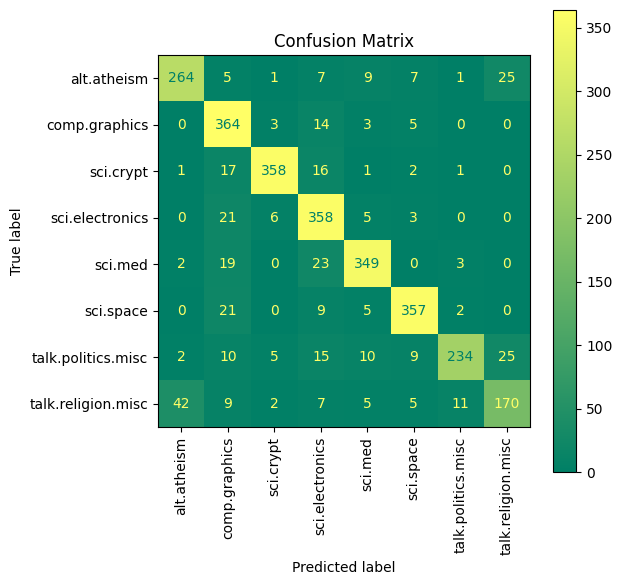

In [6]:
createMatrix(lr_pred_tfidf)

In [7]:
ClassificationReport(lr_pred_tfidf)

                    precision    recall  f1-score   support

       alt.atheism       0.85      0.83      0.84       319
     comp.graphics       0.78      0.94      0.85       389
         sci.crypt       0.95      0.90      0.93       396
   sci.electronics       0.80      0.91      0.85       393
           sci.med       0.90      0.88      0.89       396
         sci.space       0.92      0.91      0.91       394
talk.politics.misc       0.93      0.75      0.83       310
talk.religion.misc       0.77      0.68      0.72       251

          accuracy                           0.86      2848
         macro avg       0.86      0.85      0.85      2848
      weighted avg       0.87      0.86      0.86      2848



## Count Vectorizer

In [8]:
pipeline = Pipeline([
    ('Count vectorizer', CountVectorizer()),
    ('Tf-idf transformer', TfidfTransformer()),
    ('Logistic Regression', LogisticRegression())
])

pipeline.fit(X_train, y_train)
lr_pred_count = pipeline.predict(X_test)

acc = accuracy_score(y_test, lr_pred_count) * 100
print(f"Accuracy: {acc:.2f}%")

Accuracy: 84.30%


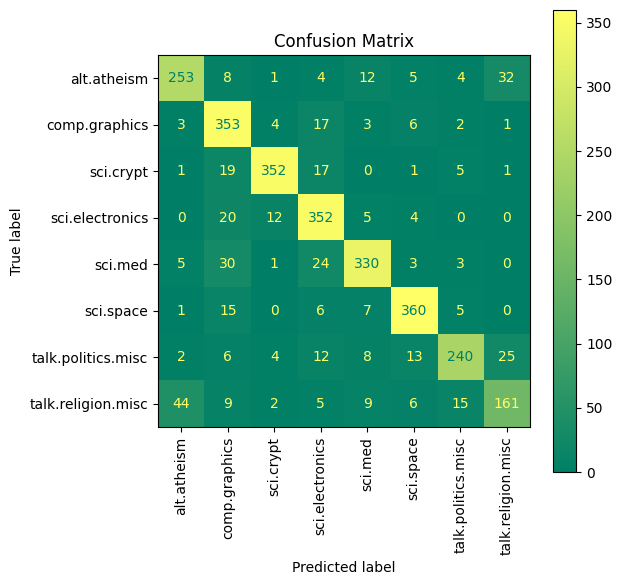

In [9]:
createMatrix(lr_pred_count)

In [10]:
ClassificationReport(lr_pred_count)

                    precision    recall  f1-score   support

       alt.atheism       0.82      0.79      0.81       319
     comp.graphics       0.77      0.91      0.83       389
         sci.crypt       0.94      0.89      0.91       396
   sci.electronics       0.81      0.90      0.85       393
           sci.med       0.88      0.83      0.86       396
         sci.space       0.90      0.91      0.91       394
talk.politics.misc       0.88      0.77      0.82       310
talk.religion.misc       0.73      0.64      0.68       251

          accuracy                           0.84      2848
         macro avg       0.84      0.83      0.83      2848
      weighted avg       0.85      0.84      0.84      2848



# Decicion Tree

## Tf-idf Vectorizer

In [11]:
pipeline = Pipeline([
    ('tfidf_vectorizer', TfidfVectorizer()),
    ('tfidf_transformer', TfidfTransformer()),
    ('decision_tree', DecisionTreeClassifier())
])

pipeline.fit(X_train, y_train)
dt_pred_tfidf = pipeline.predict(X_test)

acc = accuracy_score(y_test, dt_pred_tfidf) * 100
print(f"Accuracy: {acc:.2f}%")

Accuracy: 56.57%


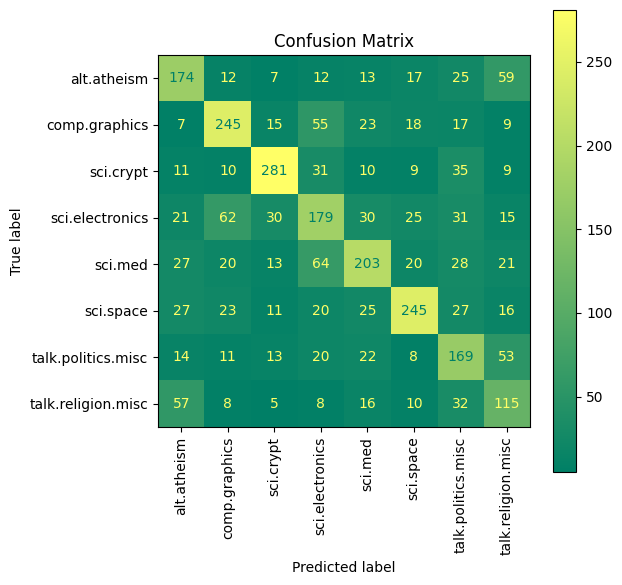

In [12]:
createMatrix(dt_pred_tfidf)

In [13]:
ClassificationReport(dt_pred_tfidf)

                    precision    recall  f1-score   support

       alt.atheism       0.51      0.55      0.53       319
     comp.graphics       0.63      0.63      0.63       389
         sci.crypt       0.75      0.71      0.73       396
   sci.electronics       0.46      0.46      0.46       393
           sci.med       0.59      0.51      0.55       396
         sci.space       0.70      0.62      0.66       394
talk.politics.misc       0.46      0.55      0.50       310
talk.religion.misc       0.39      0.46      0.42       251

          accuracy                           0.57      2848
         macro avg       0.56      0.56      0.56      2848
      weighted avg       0.57      0.57      0.57      2848



## Count Vectorizer

In [14]:
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer()),
    ('tfidf_transformer', TfidfTransformer()),
    ('decision_tree', DecisionTreeClassifier())
])

pipeline.fit(X_train, y_train)
dt_pred_count = pipeline.predict(X_test)

acc = accuracy_score(y_test, dt_pred_count) * 100
print(f"Accuracy: {acc:.2f}%")

Accuracy: 58.64%


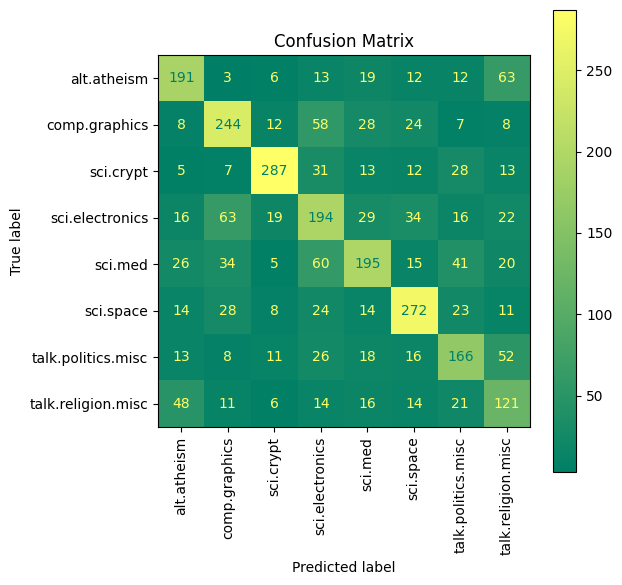

In [15]:
createMatrix(dt_pred_count)

In [16]:
ClassificationReport(dt_pred_count)

                    precision    recall  f1-score   support

       alt.atheism       0.60      0.60      0.60       319
     comp.graphics       0.61      0.63      0.62       389
         sci.crypt       0.81      0.72      0.77       396
   sci.electronics       0.46      0.49      0.48       393
           sci.med       0.59      0.49      0.54       396
         sci.space       0.68      0.69      0.69       394
talk.politics.misc       0.53      0.54      0.53       310
talk.religion.misc       0.39      0.48      0.43       251

          accuracy                           0.59      2848
         macro avg       0.58      0.58      0.58      2848
      weighted avg       0.59      0.59      0.59      2848

